In [327]:
import numpy as np
import matplotlib.pyplot as plt
print("importing modules done")

importing modules done


In [328]:
def fft_array(array, chunk_n):
    if len(array)%chunk_n != 0:
        exit -1
    spliter = len(array)/chunk_n
    print("array being spllited by: {}".format(spliter))
    splited_array = np.array_split(array,spliter)
    aux = []
    for piece in splited_array:
        aux.append(np.fft.fft(piece) )
    return aux

def total_power(array):
    return np.power(np.abs(array),2)

def total_power_list(array_list):
    aux = []
    for array in array_list:
        aux.append(total_power(array/len(array)))
    return aux

def accumulate(array_list):
    aux = np.zeros(len(array_list[0]))
    for array in array_list:
        aux += array
    return aux

def channel_accumulation(array, goal):
    # Split the array into the desired number of windows
    windows = np.array_split(array, goal)
    # Pre-allocate the result array with the correct size
    result = np.zeros(len(windows))
    # Accumulate the sum of each window into the result array
    for i in range(len(windows)):
        result[i] = np.sum(windows[i])
    return result

def channel_accumulation_list(array_list,goal):
    print("The length of windows:", len(array_list))
    aux = []
    for array in array_list:
        aux.append(channel_accumulation(array,goal))
    return aux

def correlation(lista1, lista2):
    aux = []
    for i in range(len(lista1)):
        lista2_conjugated = np.conjugate(lista2[i])
        correlation_result = np.multiply(lista1[i],lista2_conjugated)
        aux.append(correlation_result)
    return aux

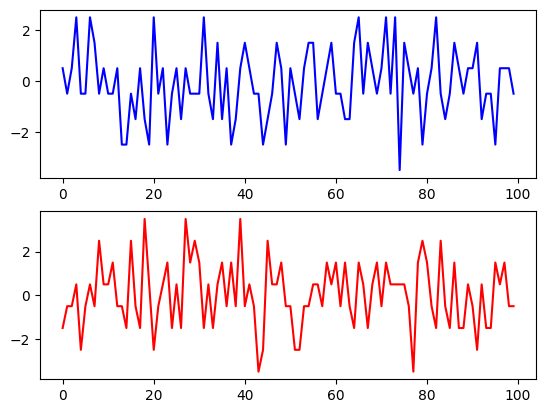

In [329]:
""" Same config utilized by Manabu """
delay = 1024               # zero: auto data,   positive integer: cross data
seed = 42               # Fixed seed for the random number generator
quant_levels = np.array([-7/2, -5/2, -3/2, -1/2, 1/2, 3/2, 5/2, 7/2])  # Quantization levels
half_width = 3
np.random.seed(seed)
time_series_lenght = 2**20

""" Same timeseries utilized by Manabu """
noise = np.random.normal(loc=0, scale=half_width / 2, size=time_series_lenght)
indices = np.digitize(noise, bins=(quant_levels[:-1] + quant_levels[1:]) / 2)
quantized_noise = quant_levels[indices]

""" Rolling the array """
noise_array = quantized_noise
noise_array_rolled = np.roll(noise_array,delay)

""" Take a look into the first 100 values """
figs , axs = plt.subplots(2,1)
axs[0].plot(noise_array[0:100],'b')
axs[1].plot(noise_array_rolled[0:100],'r')
plt.show()

In [330]:
def experiment(goal_window_size, fft_window, source1, source2):
    
    
    fft_1_list = fft_array(source1,fft_window)
    fft_2_list = fft_array(source2,fft_window)

    correlated_array = correlation(fft_1_list,fft_2_list)
    correlated_power = total_power_list(correlated_array)
    reduced_power = channel_accumulation_list(correlated_power,goal_window_size)
    #accumulated_power = accumulate(correlated_power)
    reduced_data = accumulate(reduced_power)
    #reduced_data = channel_accumulation(accumulated_power,goal_window_size)

    return reduced_data

array being spllited by: 4096.0
array being spllited by: 4096.0
The length of windows: 4096
array being spllited by: 32.0
array being spllited by: 32.0
The length of windows: 32
array being spllited by: 1.0
array being spllited by: 1.0
The length of windows: 1
0.5174067926960876


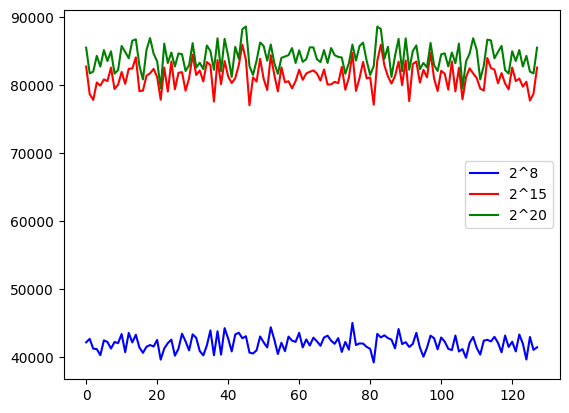

In [331]:
result1 = experiment(128,2**8,noise_array,noise_array_rolled)
result2 = experiment(128,2**15,noise_array,noise_array_rolled)
result3 = experiment(128,2**20,noise_array,noise_array_rolled)
total_power_ratio = np.sum(result1)/np.sum(result2)
print(total_power_ratio)
plt.figure()
plt.plot(result1,'b', label = '2^8')
plt.plot(result2,'r', label = '2^15')
plt.plot(result3,'g', label = '2^20')
plt.legend()
plt.show()